###**Description of the dataset**


This dataset dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V.

The "target" field refers to the **presence of heart disease** in the patient.

**The aim of the analysis** of this dataset is to investigate assosiation of given features, such as age, sex, as well as medical measurements (blood pressure, electrocardiogram results, etc) with the development of heart disease.

More information about the dataset can be accessed via this link: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

###**Preparatory steps**

In [1]:
#Upload necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Upload the data
data = pd.read_csv("heart.csv")

###**Discover the dataset**

In [3]:
data.shape

(918, 12)

The dataset contains 12 variables and 918 observations

In [4]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [6]:
data["RestingECG"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [7]:
data["FastingBS"].unique()

array([0, 1])

In [8]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


###***Summary***
The dataset contains such columns as:


**Age** - how old the patient is (28-77 y.o.)

**Sex** - M (male) or F (female)

**ChestPainType** - description of chest pain (4 types are given: TA : Typical Angina; ATA : Atypical Angina; NAP : Non-Anginal Pain; ASY : Asymptonic)

**RestingBP**: resting blood pressure (0 - 200)

**Cholesterol**: serum cholesterol [mm/dl] (0-603)

**FastingBS**: fasting blood sugar (1 : if FastingBS > 120 mg/dl; 0 : otherwise)

**RestingECG**: resting electrocardiogram results (Normal : Normal;
ST : having ST-T wave abnormality; LVH - Left Ventricular Hypertrophy)

**MaxHR**: maximum heart rate achived (60-202)

**ExerciseAngina** - exercise-induced angina (Y - yes, N - no)

**Oldpeak** - ST depression induced by exercise relative to rest (-2.6 - 6.2)

**St_slope** - the slope of the peak exercise ST segment (Up : upsloping; Flat : flat; Down : downsloping)

**HeartDesease** - absense (0) or presence (1) of heart diseases (**target feature**).


###**Missing values (NAs) check**

In [9]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

No missing values are observed in this dataset!

###**Explore the target variable**

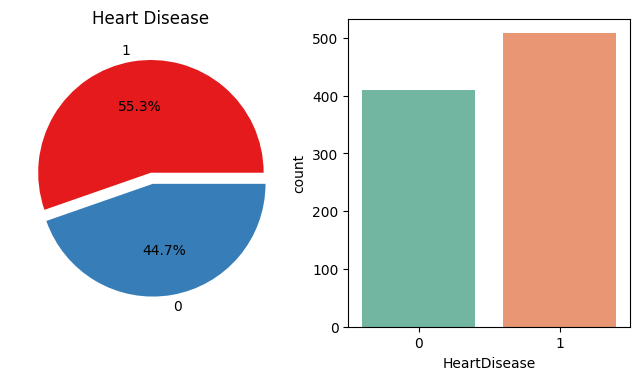

In [22]:
f, ax = plt.subplots(1,2, figsize=(8,4))
data['HeartDisease'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], colors=sns.color_palette('Set1'))
ax[0].set_title("Heart Disease")
ax[0].set_ylabel('')

sns.countplot(data, x = "HeartDisease", ax=ax[1], palette="Set2")
#ax[1].set_title("Heart Disease")

plt.show()

We observe that 55% of all studied individuals had heart disease, which is approximately 500 people

###**Check features effect on target variable**

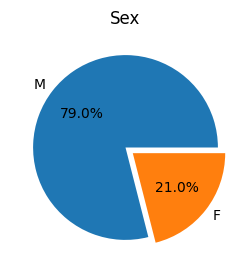

In [11]:
#Gender distribution

plt.figure(figsize=(4, 3))
data['Sex'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%')
plt.title("Sex")
plt.ylabel('')
plt.show()

####**Bivariate analysis**

In [12]:
#gender vs heart disease

pd.crosstab(data.Sex, data.HeartDisease, margins=True).style.background_gradient(cmap="summer_r")

HeartDisease,0,1,All
Sex,,,
F,143,50,193
M,267,458,725
All,410,508,918


Text(0.5, 1.0, 'Gender: Heart Disease vs Healthy')

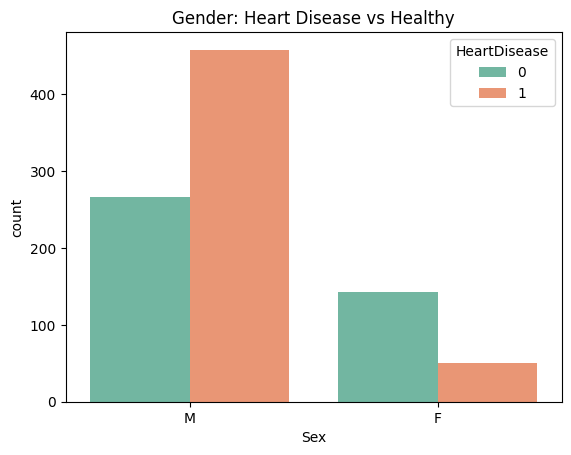

In [13]:
#data[["Sex", "HeartDisease"]].groupby(["Sex"]).mean().plot.bar()
#plt.title("Heart Disease vs Gender")

sns.countplot(data, x="Sex", hue="HeartDisease", palette="Set2")
plt.title("Gender: Heart Disease vs Healthy")

In [16]:
725/918

0.789760348583878

In [14]:
458/725

0.6317241379310344

In [15]:
50/193

0.25906735751295334

We can see that the majority (79%) of all studied individuals are males.

 63% of studied males had heart disease. Meanwhile, only 26% of all studied females had heart disease.


Now, let's explore medical measurements that are presented as categorical or ordinal data:

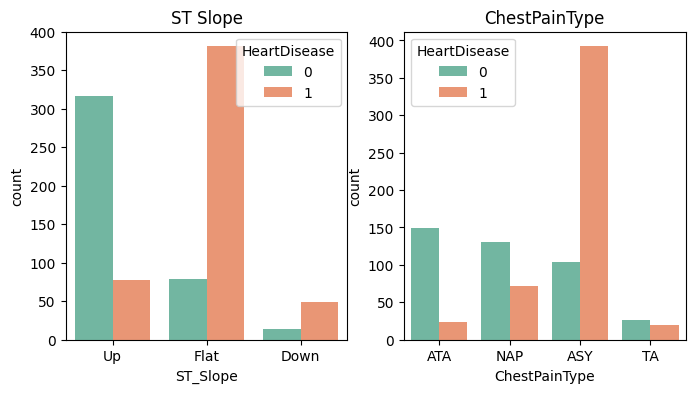

In [17]:
f, ax = plt.subplots(1,2, figsize=(8,4))

sns.countplot(data, x="ST_Slope", hue="HeartDisease", palette="Set2", ax=ax[0])
ax[0].set_title("ST Slope")

sns.countplot(data, x="ChestPainType", hue="HeartDisease", palette="Set2", ax=ax[1])
ax[1].set_title("ChestPainType")

plt.show()

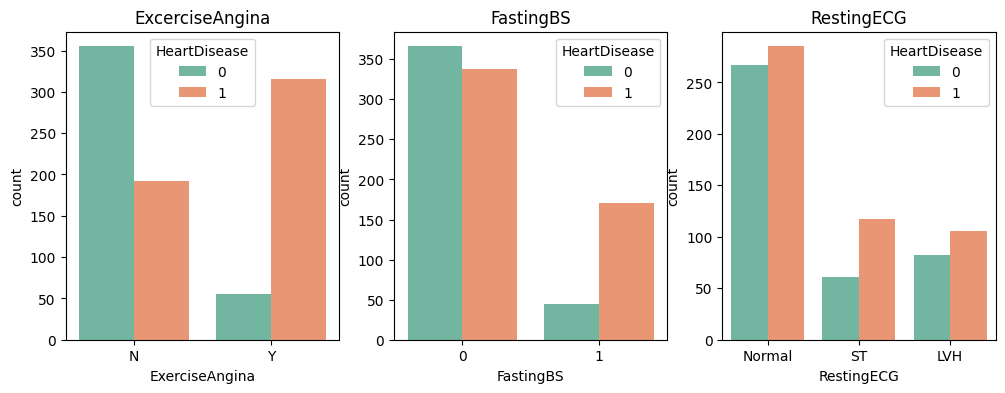

In [18]:
f, ax = plt.subplots(1,3, figsize=(12,4))

sns.countplot(data, x="ExerciseAngina", hue="HeartDisease", palette="Set2", ax=ax[0])
ax[0].set_title("ExcerciseAngina")

sns.countplot(data, x="FastingBS", hue="HeartDisease", palette="Set2", ax=ax[1])
ax[1].set_title("FastingBS")

sns.countplot(data, x="RestingECG", hue="HeartDisease", palette="Set2", ax=ax[2])
ax[2].set_title("RestingECG")

plt.show()

###***Summary***
Based on obtained plots, we can conclude that people with:

1) the flat slope of the peak exercise ST segment;

2) asymptonyc chest pain type;

3) exercise-induced angina;

4) fasting blood shugar > 120 mg/dl


were much more likely to have heart disease than people with the opposite or other status of these measurements. Therefore, we can suppose that people having previously described medical parameters have increased risk of heart diseases.

In the case of resting electrocardiogram results, even though we observe that the frequency of heart disease is higher in the case of abnormal results, people with normal ECR results were also more likely to have heart problems, that's why I haven't included this parameter in the risk list.

####**Multivariate analysis**

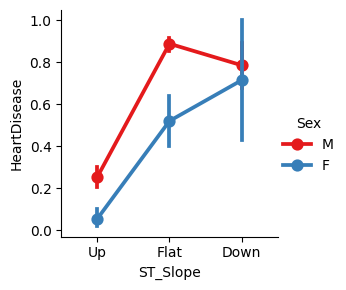

In [ ]:
sns.catplot(data, x="ST_Slope", y="HeartDisease", hue="Sex", palette="Set1",
            kind="point", height=3, aspect=1)

Males with flat slope of the peak exercise ST segment had higher change of Heart Disease, compared to females with the same parameter. In the case of up-going slope, men had a bit higher frequency of heart disease. And in the case of down-going slope, men and women had almost equal frequency of having heart disease.

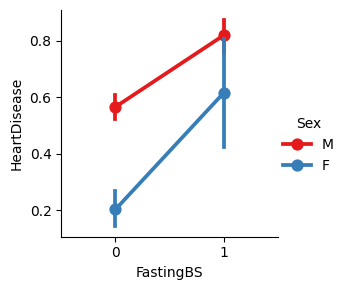

In [ ]:
sns.catplot(data, x="FastingBS", y="HeartDisease", hue="Sex", palette="Set1",
            kind="point", height=3, aspect=1)

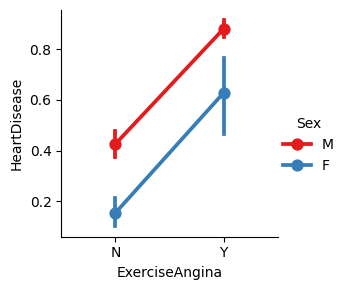

In [ ]:
sns.catplot(data, x="ExerciseAngina", y="HeartDisease", hue="Sex", palette="Set1",
            kind="point", height=3, aspect=1)

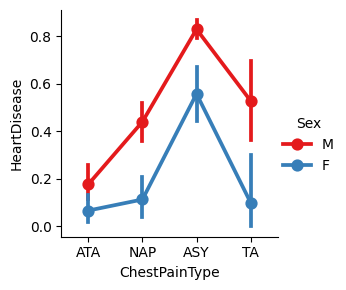

In [ ]:
sns.catplot(data, x="ChestPainType", y="HeartDisease", hue="Sex", palette="Set1",
            kind="point", height=3, aspect=1)

As for Exercise angina, Fasting blood sugar, and Chest pain type, regardless the result of these measurements, men had higher chance of getting Heart Disease than women.

####Numerical features

Now, let's visualize numerical data as well.

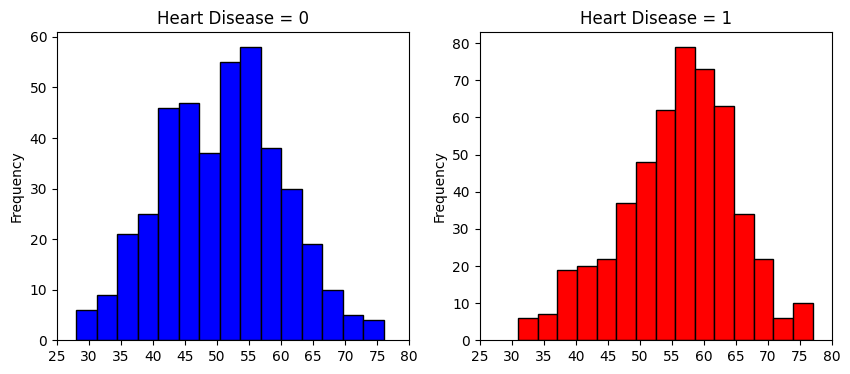

In [19]:
f, ax = plt.subplots(1,2, figsize=(10,4))

data[data["HeartDisease"]==0].Age.plot.hist(ax=ax[0], bins=15, edgecolor="black", color="blue")
ax[0].set_title("Heart Disease = 0")
x1=list(range(25,85,5))
ax[0].set_xticks(x1)


data[data["HeartDisease"]==1].Age.plot.hist(ax=ax[1], bins=15, edgecolor="black", color="red")
ax[1].set_title("Heart Disease = 1")
x1=list(range(25,85,5))
ax[1].set_xticks(x1)


From this plot we can observe that number of young people (below 50 y.o.) that have no heart diseases is higher than the number of those with heart problems. As for the people of age 50-65, the frequncy of observing heart disease has increased.

We could also try to introduce one more variable into the analysis which is Gender.

Text(0.5, 1.0, 'Gender vs Age vs Heart Disease')

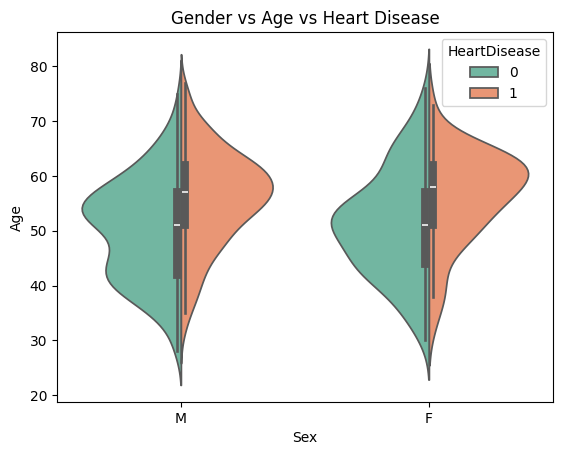

In [ ]:
sns.violinplot(data, x = "Sex", y = "Age", hue="HeartDisease", split=True, palette="Set2")
plt.title("Gender vs Age vs Heart Disease")

Based on this violin plot, we cannot observe any great difference among men and women regarding the age and heart disease status. Probably, we could speculate that the peak of women facing heart problems is at higher age than men, but I would not be very certain based only on this plot.

Now let's check other numerical variables:

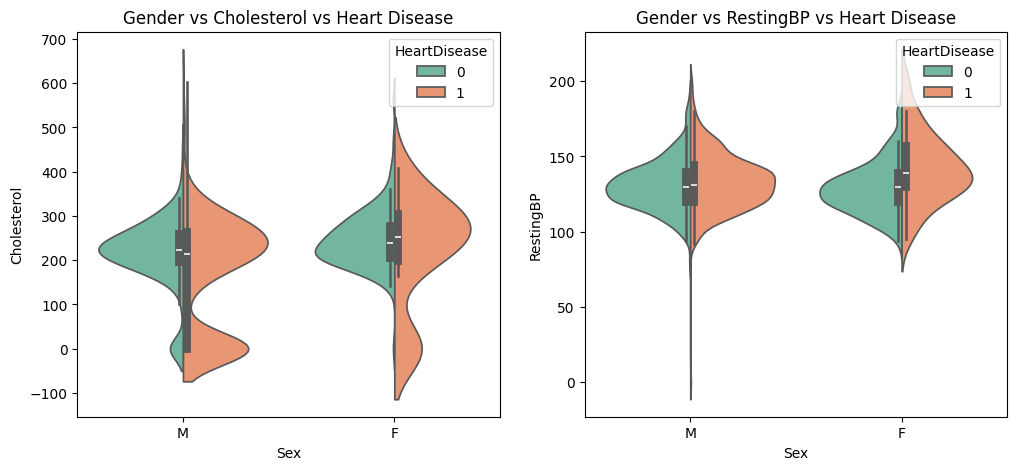

In [20]:
f, ax = plt.subplots(1,2, figsize=(12,5))

sns.violinplot(data, x = "Sex", y = "Cholesterol", hue="HeartDisease", split=True, ax=ax[0], palette="Set2")
ax[0].set_title("Gender vs Cholesterol vs Heart Disease")

sns.violinplot(data, x = "Sex", y = "RestingBP", hue="HeartDisease", split=True, ax=ax[1], palette="Set2")
ax[1].set_title("Gender vs RestingBP vs Heart Disease")

plt.show()

For women higher Cholsterol and RestingBP values could be associated with development of heart disease. For men we do not observe this tendency.

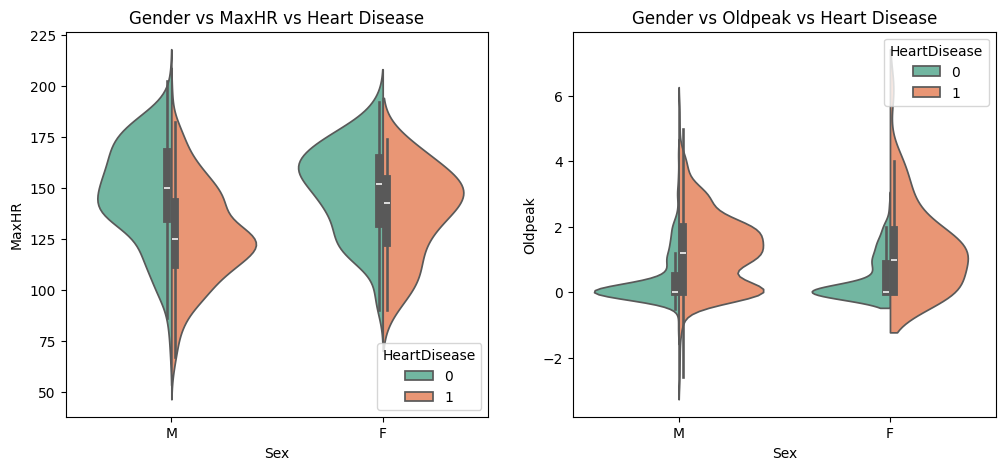

In [ ]:
f, ax = plt.subplots(1,2, figsize=(12,5))

sns.violinplot(data, x = "Sex", y = "MaxHR", hue="HeartDisease", split=True, ax=ax[0], palette="Set2")
ax[0].set_title("Gender vs MaxHR vs Heart Disease")

sns.violinplot(data, x = "Sex", y = "Oldpeak", hue="HeartDisease", split=True, ax=ax[1], palette="Set2")
ax[1].set_title("Gender vs Oldpeak vs Heart Disease")

plt.show()

Both for women and men oldpeak values different from 0 could be assiciated with the development of heart disease.

####**Analysis of numerical variables vs Gender & Outliers check**

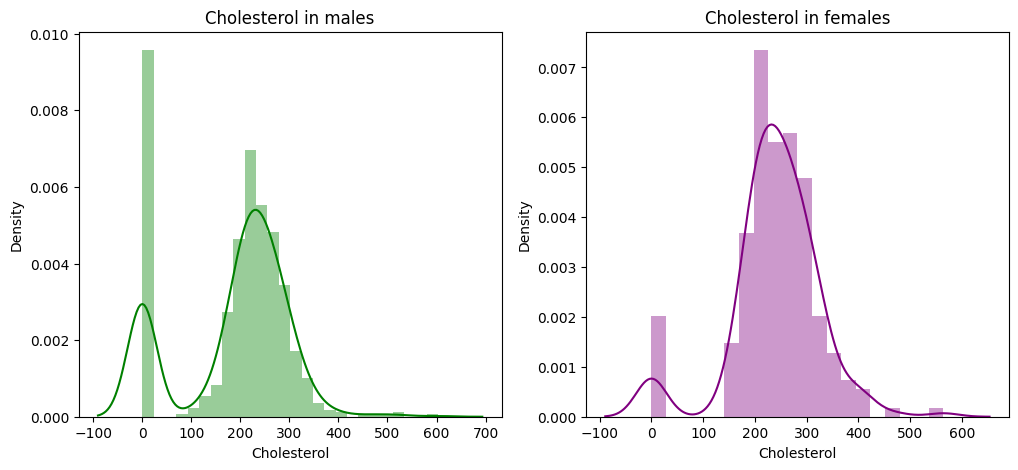

In [ ]:
f, ax = plt.subplots(1,2, figsize=(12,5))

sns.distplot(data[data["Sex"]=="M"].Cholesterol, ax=ax[0], color="green")
ax[0].set_title('Cholesterol in males')

sns.distplot(data[data["Sex"]=="F"].Cholesterol, ax=ax[1], color="purple")
ax[1].set_title('Cholesterol in females')

plt.show()

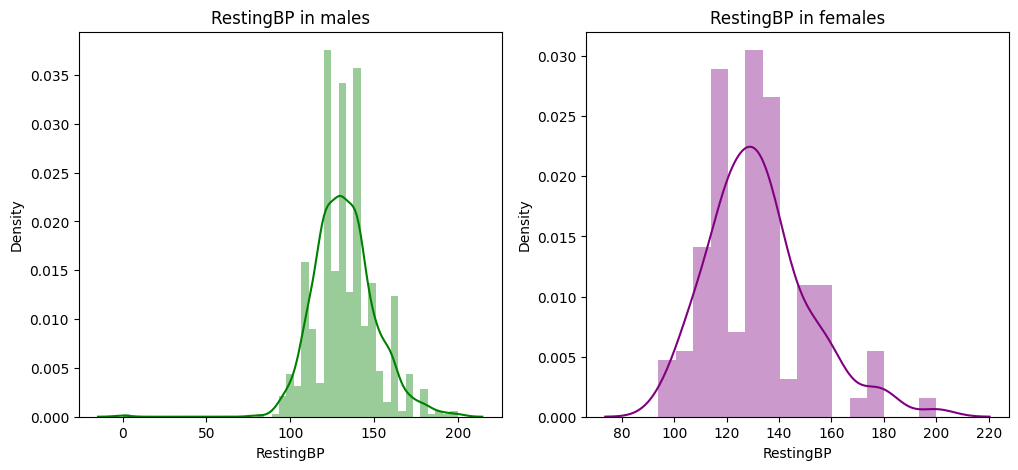

In [ ]:
f, ax = plt.subplots(1,2, figsize=(12,5))

sns.distplot(data[data["Sex"]=="M"].RestingBP, ax=ax[0], color="green")
ax[0].set_title('RestingBP in males')

sns.distplot(data[data["Sex"]=="F"].RestingBP, ax=ax[1], color="purple")
ax[1].set_title('RestingBP in females')

plt.show()

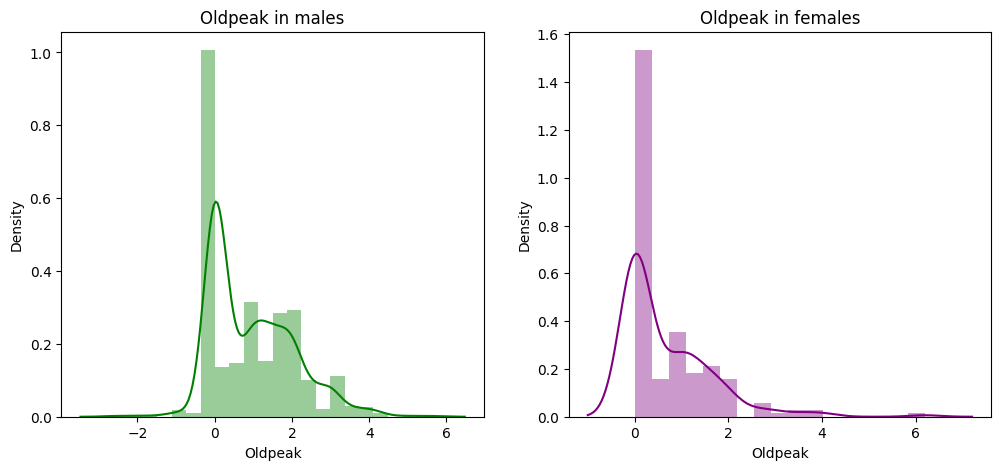

In [ ]:
f, ax = plt.subplots(1,2, figsize=(12,5))

sns.distplot(data[data["Sex"]=="M"].Oldpeak, ax=ax[0], color="green")
ax[0].set_title('Oldpeak in males')

sns.distplot(data[data["Sex"]=="F"].Oldpeak, ax=ax[1], color="purple")
ax[1].set_title('Oldpeak in females')

plt.show()

We can observe that for both males and females the most frequent Cholesterol level is 200-300 mg/dl, Resting blood pressure - ~130, ST depression induced by exercise relative to rest - around 0.

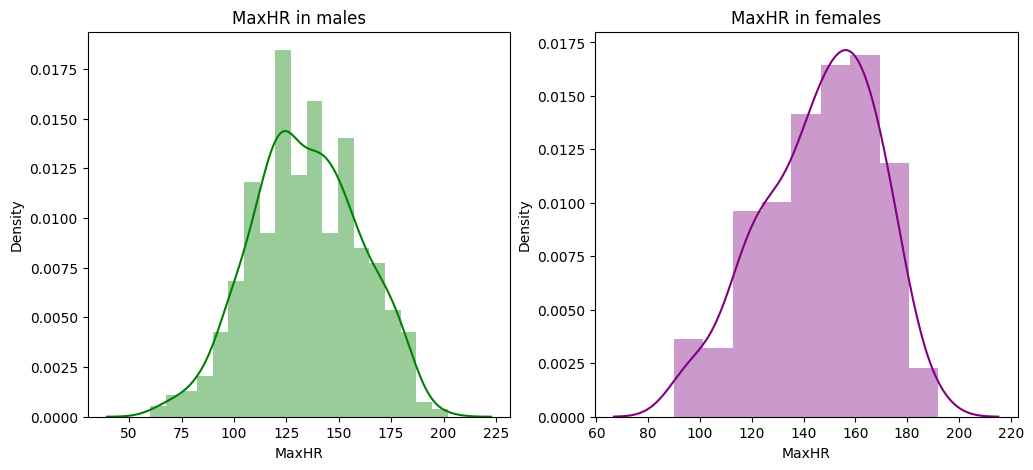

In [ ]:
f, ax = plt.subplots(1,2, figsize=(12,5))

sns.distplot(data[data["Sex"]=="M"].MaxHR, ax=ax[0], color="green")
ax[0].set_title('MaxHR in males')

sns.distplot(data[data["Sex"]=="F"].MaxHR, ax=ax[1], color="purple")
ax[1].set_title('MaxHR in females')

plt.show()

Based on this plot, in general, maximum heart rate values of studied women were higher than in the case of men. For women the most common values are 150-160, while for men - 120-125

In [21]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


####***Outliers analysis summary***

As for outliers analysis based on obtained plots, I would suggest that null values in Cholesterol variable are outliers that appeared due to wrong measurement or not proper replacement of missing values. I would also suggest that Oldpeak negative values are oulties as well.

As for RestingBP, outliers can be suspected based on obtained plot for males and description of the dataset in the previous cell.

In general, we do not expect to observe null values of RestingBP, Cholesterol, and MaxHR from people that are alive.

###***CORRELATION***

<Axes: >

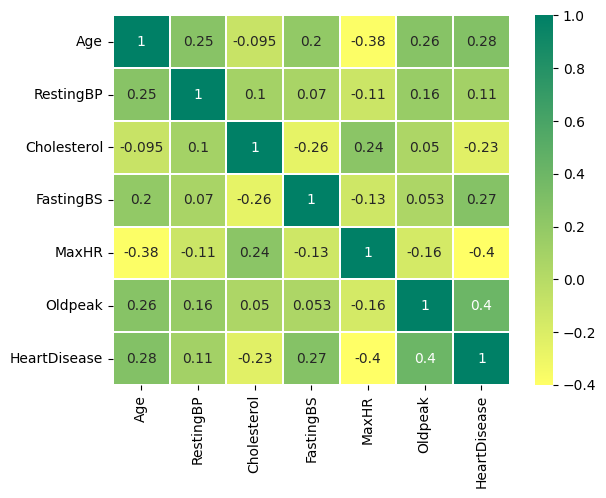

In [ ]:
data_corr = data.drop(['Sex', 'ChestPainType', 'RestingECG', "ExerciseAngina", "ST_Slope" ], axis=1)

sns.heatmap(data_corr.corr(), annot=True, cmap="summer_r", linewidth=0.2)

Based on correlation analysis or raw data, no strong correlation is observed.

##**Feature engineering or variable encoding suggestions**

Based on Exploratory Data Analysis that was carried out using this dataset, I would suggest the following:

- Filter out outliers (null values in Cholesterol, RestingBP; remove negative values in Oldpeak variable);

- group people by age ((77-28)/4=12.5, split all participants into 4 groups, step = 12.25)

- encode Gender (0 - male, 1 - female);

- encode Oldpeak: 0 (0) and 1 (other);

- encode ChestPainType as 0-3 (where 0 is TA);

- encode Exercise angina as 0 and 1 (where 0 is no);

- encode RestingECG as 0-2 (where 0 is Normal);

- encode ST_Slope as 0-2;

- RestingBP, Cholesterol, and MaxHR can also be split into several groups, using the same approach as described for the Age variable.







#**Conclusions**

To sum up, we analysed the Heart dataset from Kaggle: we studied the variables and their meaning, performed NAs and outliers check. We also carried out bivariate and multivariate analysis of different variables and studied their influence on the target variable (absence/presence of heart diseases). In other words, we tried to analyze presence of which features would increase the probability of having heart diseases. Finally, we proposed approach for data cleaning and data engineering for further ML application.

All in all, we observe that in this dataset 80% of all studied individuals are males. Meanwhile, males were more likely to have heart disease than women (63% vs 26% with heart diseases).

We also established risk factors for having heart diseases:

1) the flat slope of the peak exercise ST segment (for men this parameter had more impact than for women);

2) asymptonyc chest pain type;

3) exercise-induced angina;

4) fasting blood shugar > 120 mg/dl;

5) Oldpeak values different from 0.

